In [1]:
#pandas for working with dataframes
import pandas as pd
#numpy for sorting and analyzing data
import numpy as np
#for substituting a few characters in the preprocessing step
import re
#for acquiring the polarities and the subjectivities of the tweets using NLP
from textblob import TextBlob
#for processing the shapefiles
import geopandas as gpd
#for plotting the final maps
import matplotlib.pyplot as plt
%matplotlib inline

Task 1.1:

In [2]:
#reading the forest cover area dataset into a pandas dataframe
data=pd.read_csv('forest.csv',skiprows=4)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,4.20,4.20,4.20,4.2,4.200000e+00,4.2,4.20,4.2,4.2,NaN
1,Africa Eastern and Southern,AFE,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,4734211.36,4703021.74,4671832.12,4640642.5,4.607876e+06,4575901.2,4544314.78,4511676.2,4479395.0,NaN
2,Afghanistan,AFG,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,12084.40,12084.40,12084.40,12084.4,1.208440e+04,12084.4,12084.40,12084.4,12084.4,NaN
3,Africa Western and Central,AFW,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,1854212.96,1846256.64,1838300.32,1830344.0,1.822961e+06,1815608.1,1807898.60,1800220.1,1792580.7,NaN
4,Angola,AGO,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,710478.76,704928.14,699377.52,693826.9,6.882762e+05,682725.7,677175.10,671624.4,666073.8,NaN


In [3]:
print(np.array(data.isnull().sum()))

[  0   0   0   0 266 266 266 266 266 266 266 266 266 266 266 266 266 266
 266 266 266 266 266 266 266 266 266 266 266 266 266 266 266 266   8   8
   8   8   8   8   8   8   8   8   4   8   8   8   8   8   8   8   8   8
   4   4   4   4   4   4   4   5   5   9   9 266]


In [4]:
#cleaning up the data
for i in range(1960,1990):
    data.drop(str(i),inplace=True,axis=1)
data=data.dropna(axis=1,how='all')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Forest area (sq. km),AG.LND.FRST.K2,4.2,4.200,4.200,4.200,4.200,4.20,...,4.20,4.20,4.20,4.20,4.2,4.200000e+00,4.2,4.20,4.2,4.2
1,Africa Eastern and Southern,AFE,Forest area (sq. km),AG.LND.FRST.K2,4988232.4,4968316.114,4947640.628,4911134.742,4890838.856,4870542.97,...,4765400.98,4734211.36,4703021.74,4671832.12,4640642.5,4.607876e+06,4575901.2,4544314.78,4511676.2,4479395.0
2,Afghanistan,AFG,Forest area (sq. km),AG.LND.FRST.K2,12084.4,12084.400,12084.400,12084.400,12084.400,12084.40,...,12084.40,12084.40,12084.40,12084.40,12084.4,1.208440e+04,12084.4,12084.40,12084.4,12084.4
3,Africa Western and Central,AFW,Forest area (sq. km),AG.LND.FRST.K2,2060349.0,2049660.284,2038971.568,2028282.852,2017594.136,2006905.42,...,1862169.28,1854212.96,1846256.64,1838300.32,1830344.0,1.822961e+06,1815608.1,1807898.60,1800220.1,1792580.7
4,Angola,AGO,Forest area (sq. km),AG.LND.FRST.K2,792627.8,791073.630,789519.460,787965.290,786411.120,784856.95,...,716029.38,710478.76,704928.14,699377.52,693826.9,6.882762e+05,682725.7,677175.10,671624.4,666073.8


In [5]:
data=data.dropna()
data.shape

(253, 35)

253 samples to work with in the initial dataset

In [6]:
#reading the global shape file into a geopandas dataframe
geo_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
#merging the 2 dataframes
new_data=pd.merge(left=data,right=geo_data,left_on='Country Name',right_on='name',how='left')
new_data

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2017,2018,2019,2020,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Aruba,ABW,Forest area (sq. km),AG.LND.FRST.K2,4.2,4.200,4.200,4.200,4.200,4.20,...,4.2,4.20,4.2,4.2,NaN,NaN,NaN,NaN,NaN,None
1,Africa Eastern and Southern,AFE,Forest area (sq. km),AG.LND.FRST.K2,4988232.4,4968316.114,4947640.628,4911134.742,4890838.856,4870542.97,...,4575901.2,4544314.78,4511676.2,4479395.0,NaN,NaN,NaN,NaN,NaN,None
2,Afghanistan,AFG,Forest area (sq. km),AG.LND.FRST.K2,12084.4,12084.400,12084.400,12084.400,12084.400,12084.40,...,12084.4,12084.40,12084.4,12084.4,38041754.0,Asia,Afghanistan,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
3,Africa Western and Central,AFW,Forest area (sq. km),AG.LND.FRST.K2,2060349.0,2049660.284,2038971.568,2028282.852,2017594.136,2006905.42,...,1815608.1,1807898.60,1800220.1,1792580.7,NaN,NaN,NaN,NaN,NaN,None
4,Angola,AGO,Forest area (sq. km),AG.LND.FRST.K2,792627.8,791073.630,789519.460,787965.290,786411.120,784856.95,...,682725.7,677175.10,671624.4,666073.8,31825295.0,Africa,Angola,AGO,88815.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Samoa,WSM,Forest area (sq. km),AG.LND.FRST.K2,1761.3,1756.480,1751.660,1746.840,1742.020,1737.20,...,1631.1,1626.30,1621.5,1616.7,NaN,NaN,NaN,NaN,NaN,None
249,"Yemen, Rep.",YEM,Forest area (sq. km),AG.LND.FRST.K2,5490.0,5490.000,5490.000,5490.000,5490.000,5490.00,...,5490.0,5490.00,5490.0,5490.0,NaN,NaN,NaN,NaN,NaN,None
250,South Africa,ZAF,Forest area (sq. km),AG.LND.FRST.K2,181420.9,181056.900,180692.900,180328.900,179964.900,179600.90,...,171592.9,171228.90,170864.9,170500.9,58558270.0,Africa,South Africa,ZAF,351431.0,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
251,Zambia,ZMB,Forest area (sq. km),AG.LND.FRST.K2,474120.0,473762.000,473404.000,473046.000,472688.000,472330.00,...,453786.7,451904.60,450022.4,448140.3,17861030.0,Africa,Zambia,ZMB,23309.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


In [8]:
#retaining only the relevant rows and further cleaning up the data
rel_data=new_data[['Country Name','name','2010','2020','geometry']]
rel_data=rel_data.dropna()
map_df = gpd.GeoDataFrame(rel_data, crs="EPSG:4326", geometry='geometry')
map_df

,Country Name,name,2010,2020,geometry
2,Afghanistan,Afghanistan,12084.4,12084.4,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,Angola,Angola,721580.0,666073.8,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
5,Albania,Albania,7820.7,7889.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
8,United Arab Emirates,United Arab Emirates,3173.0,3173.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
9,Argentina,Argentina,302140.0,285730.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
...,...,...,...,...,...
246,Vietnam,Vietnam,133880.6,146430.9,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
247,Vanuatu,Vanuatu,4423.0,4423.0,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
250,South Africa,South Africa,174140.9,170500.9,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
251,Zambia,Zambia,466960.0,448140.3,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


<AxesSubplot:title={'center':'Forest area cover in 2010'}>

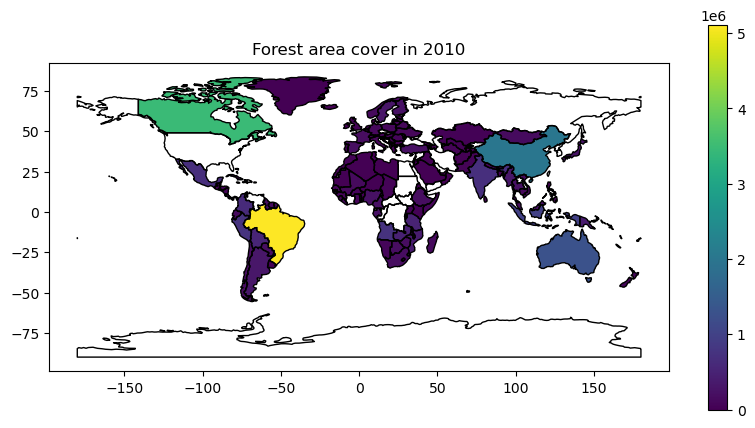

In [9]:
#plotting the chloropleth map for 2010
new_plot=geo_data.boundary.plot(edgecolor='black',linewidth=1,figsize=(10,5))
plt.title('Forest area cover in 2010')
map_df.plot(ax=new_plot,column='2010',legend=True)

<AxesSubplot:title={'center':'Forest area cover in 2020'}>

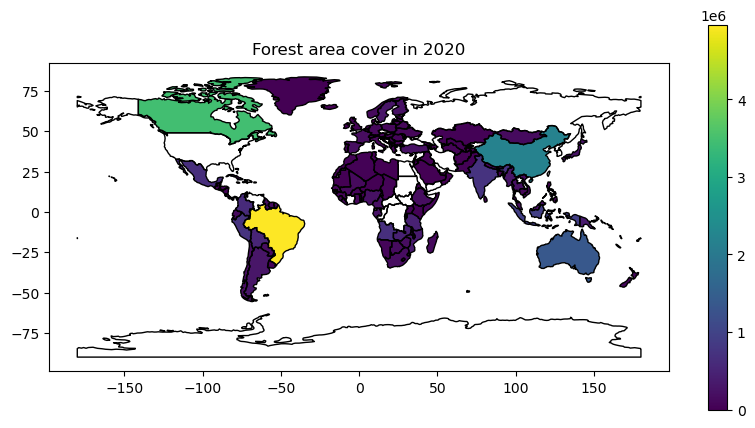

In [10]:
#plotting the chloropleth map for 2020
new_plot=geo_data.boundary.plot(edgecolor='black',linewidth=1,figsize=(10,5))
plt.title('Forest area cover in 2020')
map_df.plot(ax=new_plot,column='2020',legend=True)

Task 1.2: Analysis of Geospatial datasets

In [11]:
#reading population data into a pandas dataframe
pop_data=pd.read_csv('population.csv',skiprows=4)
pop_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN


In [12]:
print(np.array(pop_data.isnull().sum()))

[  0   0   0   0   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1   1
   2   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   2   2   2   2   2   2   2   2   2 266]


In [13]:
#cleaning up the dataframe
pop_data.dropna(axis=1,inplace=True,how='all')
pop_data=pop_data.dropna()
pop_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


Task 1.2.1:

In [14]:
#merging the 2 dataframes
rel_new_df=pd.merge(left=pop_data,right=new_data,left_on='Country Name',right_on='Country Name',how='left')
rel_new_df

,Country Name,Country Code_x,Indicator Name_x,Indicator Code_x,1960,1961,1962,1963,1964,1965,...,2017_y,2018_y,2019_y,2020_y,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,4.2,4.20,4.2,4.2,NaN,NaN,NaN,NaN,NaN,None
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,4575901.2,4544314.78,4511676.2,4479395.0,NaN,NaN,NaN,NaN,NaN,None
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,12084.4,12084.40,12084.4,12084.4,38041754.0,Asia,Afghanistan,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,1815608.1,1807898.60,1800220.1,1792580.7,NaN,NaN,NaN,NaN,NaN,None
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,682725.7,677175.10,671624.4,666073.8,31825295.0,Africa,Angola,AGO,88815.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
258,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,5490.0,5490.00,5490.0,5490.0,NaN,NaN,NaN,NaN,NaN,None
259,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,171592.9,171228.90,170864.9,170500.9,58558270.0,Africa,South Africa,ZAF,351431.0,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
260,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,453786.7,451904.60,450022.4,448140.3,17861030.0,Africa,Zambia,ZMB,23309.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


In [15]:
#preserving only the relevant columns
for_pop_df=rel_new_df[['Country Name','2006_x','2006_y','name','geometry']]
for_pop_df=for_pop_df.dropna()
for_pop_df

,Country Name,2006_x,2006_y,name,geometry
2,Afghanistan,26433058.0,12084.40,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,Angola,20149905.0,743782.44,Angola,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
5,Albania,2992547.0,7769.62,Albania,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
8,United Arab Emirates,5300172.0,3141.52,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
9,Argentina,39289876.0,314796.00,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
...,...,...,...,...,...
253,Vietnam,84617545.0,127464.76,Vietnam,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
254,Vanuatu,214379.0,4423.00,Vanuatu,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
259,South Africa,48489464.0,175596.90,South Africa,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
260,Zambia,12173518.0,468392.00,Zambia,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


In [16]:
#applying the given condition
df_2006=for_pop_df.loc[for_pop_df['2006_x']<142538305]
df_2006

,Country Name,2006_x,2006_y,name,geometry
2,Afghanistan,26433058.0,12084.40,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,Angola,20149905.0,743782.44,Angola,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
5,Albania,2992547.0,7769.62,Albania,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
8,United Arab Emirates,5300172.0,3141.52,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
9,Argentina,39289876.0,314796.00,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
...,...,...,...,...,...
253,Vietnam,84617545.0,127464.76,Vietnam,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
254,Vanuatu,214379.0,4423.00,Vanuatu,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
259,South Africa,48489464.0,175596.90,South Africa,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
260,Zambia,12173518.0,468392.00,Zambia,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


In [17]:
df_2006.describe()

,2006_x,2006_y
count,1.330000e+02,1.330000e+02
mean,1.838260e+07,1.321564e+05
std,2.537365e+07,3.444072e+05
min,5.677400e+04,0.000000e+00
25%,3.325403e+06,8.385520e+03
50%,9.043342e+06,3.319672e+04
75%,2.119376e+07,1.329600e+05
max,1.409212e+08,3.475141e+06


<AxesSubplot:title={'center':'Forest area cover in 2006 for countries with low population sizes'}>

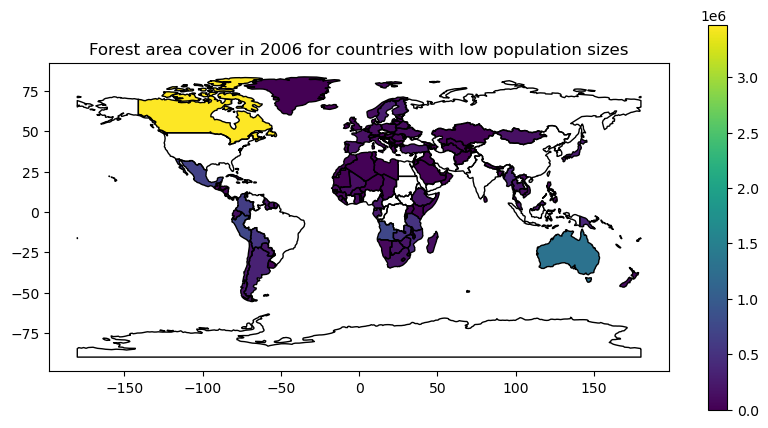

In [18]:
#plotting the chloropleth maps with the given conditions
map_df = gpd.GeoDataFrame(df_2006, crs="EPSG:4326", geometry='geometry')
new_plot=geo_data.boundary.plot(edgecolor='black',linewidth=1,figsize=(10,5))
plt.title('Forest area cover in 2006 for countries with low population sizes')
map_df.plot(ax=new_plot,column='2006_y',legend=True)

Task 1.2.2:

In [19]:
#making abother dataframe with the given condition
df_2006=for_pop_df.loc[for_pop_df['2006_x']>298379912]
df_2006

,Country Name,2006_x,2006_y,name,geometry
40,China,1.311020e+09,1911664.48,China,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
108,India,1.165486e+09,687340.00,India,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."


In [20]:
df_2006.describe()

,2006_x,2006_y
count,2.000000e+00,2.000000e+00
mean,1.238253e+09,1.299502e+06
std,1.029079e+08,8.657281e+05
min,1.165486e+09,6.873400e+05
25%,1.201870e+09,9.934211e+05
50%,1.238253e+09,1.299502e+06
75%,1.274637e+09,1.605583e+06
max,1.311020e+09,1.911664e+06


<AxesSubplot:title={'center':'Forest area cover in 2006 for countries with high population sizes'}>

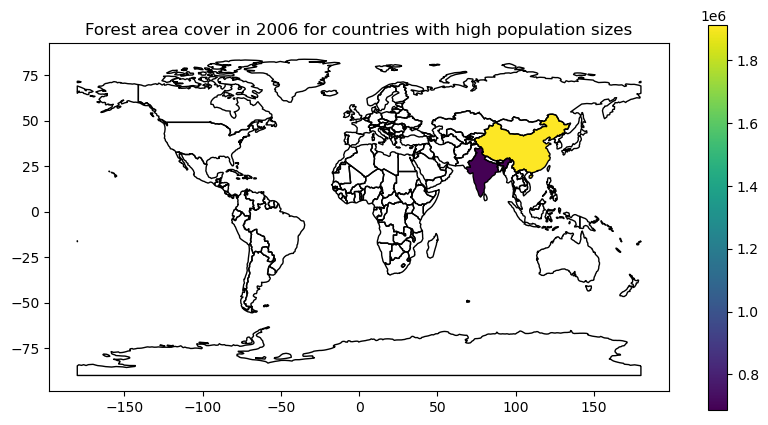

In [21]:
#plotting the chloropleth maps with the given conditions
map_df = gpd.GeoDataFrame(df_2006, crs="EPSG:4326", geometry='geometry')
new_plot=geo_data.boundary.plot(edgecolor='black',linewidth=1,figsize=(10,5))
plt.title('Forest area cover in 2006 for countries with high population sizes')
map_df.plot(ax=new_plot,column='2006_y',legend=True)

Task 1.2.3:

In [22]:
#making abother dataframe with the given condition
df_2006 = for_pop_df[for_pop_df['2006_x'].between(188167353, 1165486291)]
df_2006

,Country Name,2006_x,2006_y,name,geometry
29,Brazil,1.881674e+08,5273838.6,Brazil,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
105,Indonesia,2.293183e+08,1003075.2,Indonesia,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
108,India,1.165486e+09,687340.0,India,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."


<AxesSubplot:title={'center':'Forest area cover in 2006 for countries with high population sizes'}>

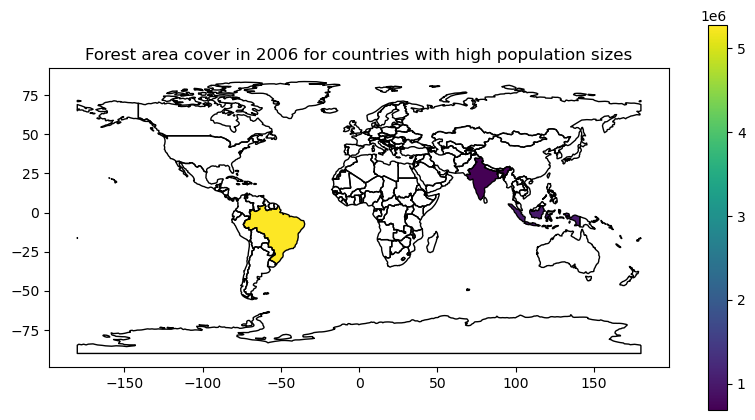

In [23]:
#plotting the chloropleth maps with the given conditions
map_df = gpd.GeoDataFrame(df_2006, crs="EPSG:4326", geometry='geometry')
new_plot=geo_data.boundary.plot(edgecolor='black',linewidth=1,figsize=(10,5))
plt.title('Forest area cover in 2006 for countries with high population sizes')
map_df.plot(ax=new_plot,column='2006_y',legend=True)

Task 1.2.4:

In [24]:
row=for_pop_df[for_pop_df['2006_x'].isin([for_pop_df['2006_x'].max()])]
row['Country Name']

40    China
Name: Country Name, dtype: object

China has the largest population in 2006

In [25]:
#narrowing the df down to china
china_data=rel_new_df.loc[rel_new_df['Country Name']=='China']
china_data

,Country Name,Country Code_x,Indicator Name_x,Indicator Code_x,1960,1961,1962,1963,1964,1965,...,2017_y,2018_y,2019_y,2020_y,pop_est,continent,name,iso_a3,gdp_md_est,geometry
40,China,CHN,"Population, total",SP.POP.TOTL,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,...,2143394.7,2162190.4,2180986.1,2199781.8,1.397715e+09,Asia,China,CHN,14342903.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."


In [26]:
#only retaining the data that we need
year_df=pd.DataFrame(china_data['Country Name'])
for i in range(2000,2011):
    year_df[str(i)]=china_data[str(i)+'_y']
year_df=year_df.rename({40:'forest cover'},axis='index')
year_df

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
forest cover,China,1770005.5,1793615.33,1817225.16,1840834.99,1864444.82,1888054.65,1911664.48,1935274.31,1958884.14,1982493.97,2006103.8


In [27]:
#cleaning up the data and converting it into an easily readable form
year_df.drop('Country Name',axis=1,inplace=True)
year_df=year_df.transpose()
year_df['year']=np.array(range(2000,2011))
#getting the percentage change
year_df['Percentage change']=year_df['forest cover'].pct_change()
year_df

,forest cover,year,Percentage change
2000,1770005.50,2000,NaN
2001,1793615.33,2001,0.013339
2002,1817225.16,2002,0.013163
2003,1840834.99,2003,0.012992
2004,1864444.82,2004,0.012826
2005,1888054.65,2005,0.012663
2006,1911664.48,2006,0.012505
2007,1935274.31,2007,0.012350
2008,1958884.14,2008,0.012200
2009,1982493.97,2009,0.012053


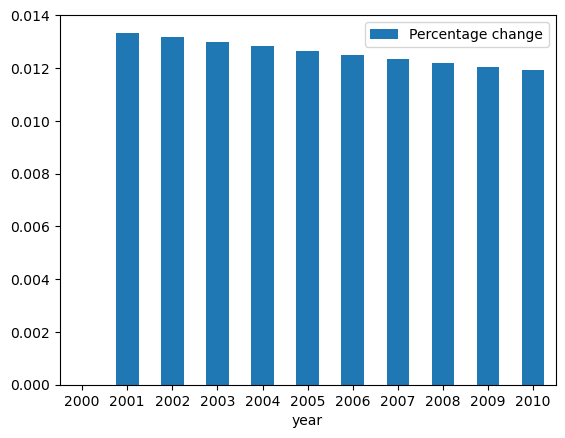

In [28]:
#plotting the bar graph
year_df['Percentage change'].fillna(value=0)
ax = year_df.plot.bar(x='year', y='Percentage change', rot=0)

Task 1.2.5:

In [29]:
#preparing 2 new dataframes
year_df1=pd.DataFrame(rel_new_df['Country Name'])
forest_df=pd.DataFrame(rel_new_df['Country Name'])
for i in range(2000,2011):
    year_df1[str(i)+'f']=rel_new_df[str(i)+'_y']
for j in range(2000,2011):
    forest_df[str(j)]=rel_new_df[str(i)+'_x']
print(year_df1)
print(forest_df)

                    Country Name       2000f        2001f        2002f  \
0                          Aruba        4.20        4.200        4.200   
1    Africa Eastern and Southern  5058895.14  4744578.076  4720092.612   
2                    Afghanistan    12084.40    12084.400    12084.400   
3     Africa Western and Central  1953461.84  1945128.216  1936794.592   
4                         Angola   777086.10   771535.490   765984.880   
..                           ...         ...          ...          ...   
257                       Kosovo         NaN          NaN          NaN   
258                  Yemen, Rep.     5490.00     5490.000     5490.000   
259                 South Africa   177780.90   177416.900   177052.900   
260                       Zambia   470540.00   470182.000   469824.000   
261                     Zimbabwe   183659.80   183199.100   182738.400   

           2003f        2004f       2005f        2006f        2007f  \
0          4.200        4.200        4.2

In [30]:
#figuring out the means of both dataframes over the given years
year_df1['mean']= year_df1.iloc[:, 1:].mean(axis=1)
forest_df['mean']= forest_df.iloc[:, 1:].mean(axis=1)
print(year_df1)
print(forest_df)

                    Country Name       2000f        2001f        2002f  \
0                          Aruba        4.20        4.200        4.200   
1    Africa Eastern and Southern  5058895.14  4744578.076  4720092.612   
2                    Afghanistan    12084.40    12084.400    12084.400   
3     Africa Western and Central  1953461.84  1945128.216  1936794.592   
4                         Angola   777086.10   771535.490   765984.880   
..                           ...         ...          ...          ...   
257                       Kosovo         NaN          NaN          NaN   
258                  Yemen, Rep.     5490.00     5490.000     5490.000   
259                 South Africa   177780.90   177416.900   177052.900   
260                       Zambia   470540.00   470182.000   469824.000   
261                     Zimbabwe   183659.80   183199.100   182738.400   

           2003f        2004f       2005f        2006f        2007f  \
0          4.200        4.200        4.2

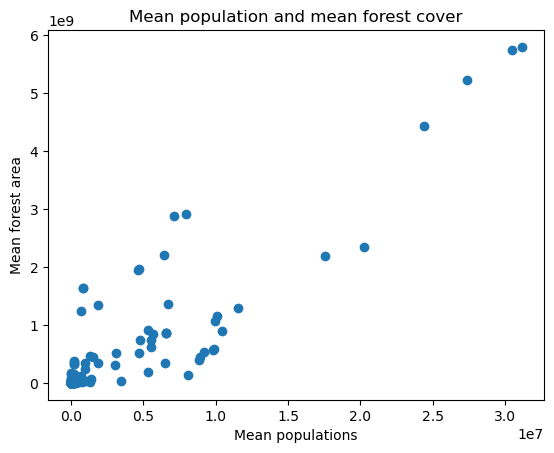

In [31]:
#plotting the scatter plot
plt.scatter(np.array(year_df1['mean']),np.array(forest_df['mean']))
plt.title('Mean population and mean forest cover')
plt.xlabel('Mean populations')
plt.ylabel('Mean forest area')
plt.show()

Task 2.1: Preprocessing

In [32]:
#reading the initial data as a dataframe
df=pd.read_csv('Geospatq2.csv')
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,15/10/2020 00:00,1.320000e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,üåê Noticias de inter√©s para latinos de la c...,...,1860,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,21/10/2020 00:00
1,15/10/2020 00:00,1.320000e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0,0,Twitter for iPad,8.099044e+08,Cheri A. üá∫üá∏,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.5
2,15/10/2020 00:00,1.320000e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0,0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,00:01.0
3,15/10/2020 00:00,1.320000e+18,@chrislongview Watching and setting dvr. Let‚Ä...,0,0,Twitter for iPhone,8.240000e+17,Michelle Ferg,MichelleFerg4,NaN,...,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.6
4,15/10/2020 00:00,1.320000e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1,0,Twitter Web App,1.030000e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,00:02.1


In [33]:
#preserving only the relevant columns
df=df[['tweet','lat','long','country','state']]
print(df)

                                                 tweet        lat        long  \
0    #Elecciones2020 | En #Florida: #JoeBiden dice ...  25.774270  -80.193660   
1    #HunterBiden #HunterBidenEmails #JoeBiden #Joe...        NaN         NaN   
2    @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...  46.304036 -109.171431   
3    @chrislongview Watching and setting dvr. Let‚Ä...        NaN         NaN   
4    #censorship #HunterBiden #Biden #BidenEmails #...  36.701463 -118.755997   
..                                                 ...        ...         ...   
495  Must watchüëáüèª#Biden family corruption. ht...        NaN         NaN   
496  FACTS: @JoeBiden has been accused of sexual as...  36.638392  127.696119   
497  Hunter #Biden won a Nobel Peace Prize, R's try...  41.299538  -74.848779   
498  This is utter bullshit. This was a news articl...        NaN         NaN   
499  Does the #HunterBiden #HunterBidenEmails #NYPo...  41.737023  -99.587382   

                      count

In [34]:
arr=np.array(df['tweet'])
arr1=[]
fin_lis=[]
#looping through all the tweets and filtering out certain symbols
for i in range(len(arr)):
    arr[i]=re.sub('[^a-zA-Z0-9 ]+', '', arr[i])
    for j in arr[i].split():
        if 'http' not in j:
            arr1.append(j)
    fin_lis.append(arr1)
    arr1=[]
#preparing the final tweets list
for i in range(len(fin_lis)):
    if len(fin_lis[i])!=0:
        fin_lis[i]=" ".join(fin_lis[i])
    else:
        fin_lis[i]=np.nan
#appending the list to pre-existing dataframe
df['tweet']=fin_lis
df

,tweet,lat,long,country,state
0,Elecciones2020 En Florida JoeBiden dice que Do...,25.774270,-80.193660,United States of America,Florida
1,HunterBiden HunterBidenEmails JoeBiden JoeBide...,NaN,NaN,NaN,NaN
2,IslandGirlPRV BradBeauregardJ MeidasTouch This...,46.304036,-109.171431,United States of America,Montana
3,chrislongview Watching and setting dvr Lets gi...,NaN,NaN,NaN,NaN
4,censorship HunterBiden Biden BidenEmails Biden...,36.701463,-118.755997,United States of America,California
...,...,...,...,...,...
495,Must watchBiden family corruption,NaN,NaN,NaN,NaN
496,FACTS JoeBiden has been accused of sexual assa...,36.638392,127.696119,South Korea,NaN
497,Hunter Biden won a Nobel Peace Prize Rs try to...,41.299538,-74.848779,United States of America,Pennsylvania
498,This is utter bullshit This was a news article...,NaN,NaN,NaN,NaN


In [35]:
df.isnull().sum()

tweet        0
lat        283
long       283
country    283
state      330
dtype: int64

In [36]:
map_df=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [37]:
#merging both datasets
map_df=pd.merge(left=map_df,right=df,left_on='name',right_on='country',how='left')
map_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,tweet,lat,long,country,state
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",COME OUT A HUGE CROWD ALL OUT AND VOTE BIDENHA...,45.497216,-73.610364,Canada,Quebec
4,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Share who you are voting for you dont have to ...,43.256080,-79.872858,Canada,Ontario


In [38]:
#dropping all rows with nan values
map_df=map_df.dropna()
map_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,tweet,lat,long,country,state
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",COME OUT A HUGE CROWD ALL OUT AND VOTE BIDENHA...,45.497216,-73.610364,Canada,Quebec
4,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Share who you are voting for you dont have to ...,43.256080,-79.872858,Canada,Ontario
7,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",jack nypost Bugger context No URL blocking of ...,45.497216,-73.610364,Canada,Quebec
9,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",It looks like Twitter is in full spin mode def...,43.324892,-79.796684,Canada,Ontario
11,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",JoeBiden calls early lid for reporters amid th...,43.653482,-79.383935,Canada,Ontario
...,...,...,...,...,...,...,...,...,...,...,...
305,66834405.0,Europe,United Kingdom,GBR,2829108,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",VoteThemAllOut VoteBlue VoteHimOut VoteBidenHa...,53.479489,-2.245115,United Kingdom,England
306,66834405.0,Europe,United Kingdom,GBR,2829108,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",lukemcgee Biden,52.795479,-0.540240,United Kingdom,England
307,66834405.0,Europe,United Kingdom,GBR,2829108,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",Twitter Locks Account of White House Press Sec...,52.795479,-0.540240,United Kingdom,England
327,100388073.0,Africa,Egypt,EGY,303092,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",I still cant retweet this nypost report on Hun...,31.193277,30.054019,Egypt,Alexandria Governorate


dataframe after preprocessing

In [39]:
map_df.nunique()

pop_est        14
continent       5
name           14
iso_a3         14
gdp_md_est     14
geometry       14
tweet         169
lat           111
long          111
country        14
state          49
dtype: int64

all the unique values

Task2.2: Polarity Analysis

In [40]:
#extracting polarities of all tweets
pol_lis=[]
for i in map_df['tweet']:
    pol_lis.append(TextBlob(i).polarity)
print(np.array(pol_lis))

[ 0.6         0.          0.          0.35        0.1        -0.4
 -0.475       0.          0.          0.          0.         -0.14880952
 -0.1        -1.          0.          0.14        0.          0.
  0.          0.07857143  0.5         0.          0.4        -0.3
  0.          0.04444444  0.          0.          0.         -0.18181818
  0.          0.          0.07083333 -0.225       0.6         0.
  0.         -0.20277778  0.          0.          0.          0.06428571
  0.1         0.          0.5        -1.          0.05        0.
  0.          0.06044372 -0.25       -0.5         0.2         0.
  0.2        -0.325      -0.33333333  0.2202381   0.1         0.13636364
  0.00568182  0.          0.3         0.0952381   0.          0.
 -0.5         0.          0.525       0.          0.          0.08928571
  0.27083333  0.          0.          0.          0.          0.
  0.15        0.2         0.          0.          0.          0.
  0.          0.          0.          0.4       

In [41]:
map_df['polarity']=pol_lis
map_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,tweet,lat,long,country,state,polarity
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",COME OUT A HUGE CROWD ALL OUT AND VOTE BIDENHA...,45.497216,-73.610364,Canada,Quebec,0.60
4,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Share who you are voting for you dont have to ...,43.256080,-79.872858,Canada,Ontario,0.00
7,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",jack nypost Bugger context No URL blocking of ...,45.497216,-73.610364,Canada,Quebec,0.00
9,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",It looks like Twitter is in full spin mode def...,43.324892,-79.796684,Canada,Ontario,0.35
11,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",JoeBiden calls early lid for reporters amid th...,43.653482,-79.383935,Canada,Ontario,0.10


In [42]:
#conditions for polarity types
map_df.loc[map_df['polarity']==0,'polarity inclination']='Neutral'
map_df.loc[map_df['polarity']>0,'polarity inclination']='Positive'
map_df.loc[map_df['polarity']<0,'polarity inclination']='Negative'
map_df['polarity inclination'].value_counts()

Neutral     85
Positive    53
Negative    31
Name: polarity inclination, dtype: int64

<AxesSubplot:title={'center':'Polarities'}>

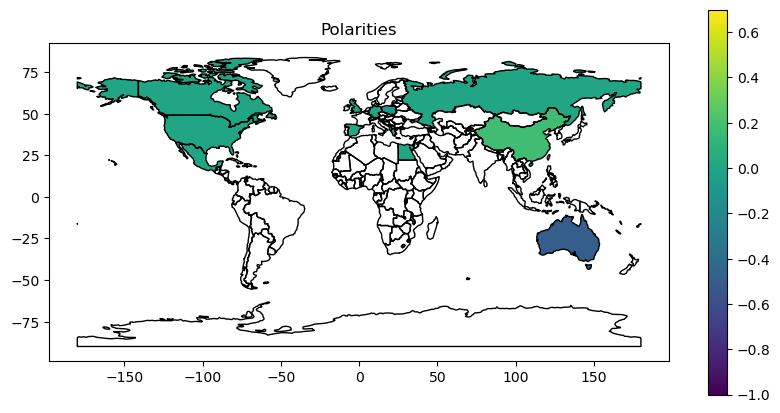

In [43]:
#getting the world map shp file to plot the boundaries
new_df=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
new_plot=new_df.boundary.plot(edgecolor='black',linewidth=1,figsize=(10,5))
plt.title('Polarities')
#plotting the map with polarity values
map_df.plot(ax=new_plot, column='polarity',legend=True)

Task 2.3: Subjectivity Analysis

In [44]:
#extracting subjectivities of all tweets
subj_lis=[]
for i in map_df['tweet']:
    subj_lis.append(TextBlob(i).subjectivity)
print(np.array(subj_lis))

[0.65       0.         0.         0.55       0.3        0.6
 0.7        0.         0.         0.         0.         0.67857143
 0.1        1.         0.         0.61777778 0.         0.
 0.         0.17857143 0.5        0.35714286 0.8        0.4
 0.1        0.32222222 0.125      0.125      0.         0.60227273
 0.         0.         0.47083333 0.65       1.         0.
 0.         0.26944444 0.         0.         0.         0.30714286
 0.525      0.         0.5        1.         0.15       0.
 0.         0.34756494 0.95       0.9        0.2        0.
 0.3        0.55       0.66666667 0.67857143 0.375      0.45454545
 0.41477273 0.         0.1        0.36746032 0.         0.
 1.         0.         0.5        0.         0.         0.35714286
 0.45416667 0.         0.         0.         0.         0.1
 0.4        0.525      0.         0.         0.         0.
 0.         0.         0.         0.7        0.425      0.
 0.         0.1        0.64444444 0.         0.         0.30222222
 0.58

In [45]:
#conditions for subjectivity types
map_df['subjectivity']=subj_lis
map_df.loc[map_df['subjectivity']==0,'subjectivity inclination']='Objective'
map_df.loc[map_df['subjectivity']>0,'subjectivity inclination']='Subjective'
map_df['subjectivity inclination'].value_counts()

Subjective    93
Objective     76
Name: subjectivity inclination, dtype: int64

<AxesSubplot:title={'center':'Subjectivities'}>

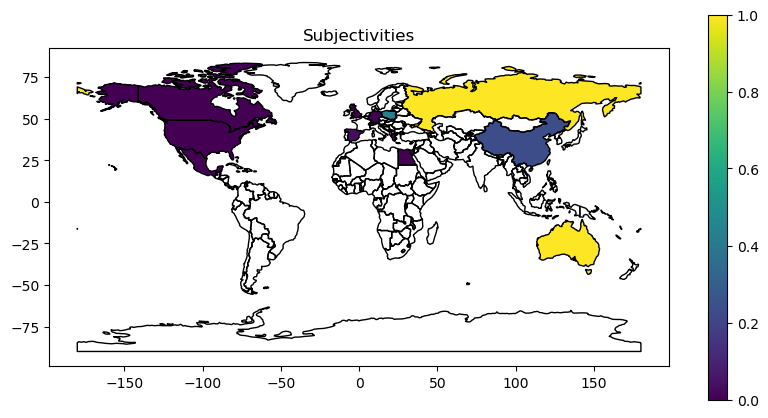

In [46]:
#getting the world map shp file to plot the boundaries
new_df=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
new_plot=new_df.boundary.plot(edgecolor='black',linewidth=1,figsize=(10,5))
plt.title('Subjectivities')
#plotting the map with polarity values
map_df.plot(ax=new_plot, column='subjectivity',legend=True)

Task 2.4: Storify/Interpretation

In [47]:
pol_df=map_df[['country','polarity']]
pol_df

,country,polarity
3,Canada,0.60
4,Canada,0.00
7,Canada,0.00
9,Canada,0.35
11,Canada,0.10
...,...,...
305,United Kingdom,0.00
306,United Kingdom,0.00
307,United Kingdom,0.00
327,Egypt,-0.10


In [48]:
#getting the country with the highest polarity
row=pol_df[pol_df.isin([pol_df['polarity'].max()])].stack().index[0][0]
pol_df['country'].loc[row]

'United States of America'

US had the highest polarity

In [49]:
#getting the country with the lowest polarity
row=pol_df[pol_df.isin([pol_df['polarity'].min()])].stack().index[0][0]
pol_df['country'].loc[row]

'United States of America'

US had the lowest polarity

In [50]:
subj_df=map_df[['country','subjectivity']]
subj_df

,country,subjectivity
3,Canada,0.65
4,Canada,0.00
7,Canada,0.00
9,Canada,0.55
11,Canada,0.30
...,...,...
305,United Kingdom,0.00
306,United Kingdom,0.00
307,United Kingdom,0.00
327,Egypt,0.10


In [51]:
#getting the country with the highest subjectivity
row=subj_df[subj_df.isin([subj_df['subjectivity'].max()])].stack().index[0][0]
subj_df['country'].loc[row]

'United States of America'

US had the highest subjectivity

In [52]:
#getting the country with the lowest subjectivity
row=subj_df[subj_df.isin([subj_df['subjectivity'].min()])].stack().index[0][0]
subj_df['country'].loc[row]

'Canada'

Canada had the lowest subjectivity

Narrowing down the dataframe to only US:

In [53]:
elec_df=map_df[map_df['country']=='United States of America']
elec_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,tweet,lat,long,country,state,polarity,polarity inclination,subjectivity,subjectivity inclination
15,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",Elecciones2020 En Florida JoeBiden dice que Do...,25.774270,-80.193660,United States of America,Florida,0.000000,Neutral,0.000000,Objective
16,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",IslandGirlPRV BradBeauregardJ MeidasTouch This...,46.304036,-109.171431,United States of America,Montana,0.000000,Neutral,0.000000,Objective
17,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",censorship HunterBiden Biden BidenEmails Biden...,36.701463,-118.755997,United States of America,California,0.000000,Neutral,0.000000,Objective
18,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",In 2020 NYPost is being censorship CENSORED by...,41.875562,-87.624421,United States of America,Illinois,-0.148810,Negative,0.678571,Subjective
19,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",FBI Allegedly Obtained Hunter Biden Computer D...,37.572603,-85.155141,United States of America,Kentucky,-0.100000,Negative,0.100000,Subjective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",ICYMI Trump Hits Biden on Fracking in Appeal t...,33.917028,-118.415634,United States of America,California,0.000000,Neutral,0.000000,Objective
150,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",AprilDRyan realDonaldTrump They were not ill j...,31.816038,-99.512099,United States of America,Texas,0.238636,Positive,0.772727,Subjective
151,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",kylegriffin1 What the part where JoeBiden didn...,29.949932,-90.070116,United States of America,Louisiana,0.000000,Neutral,0.000000,Objective
152,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",Hunter Biden won a Nobel Peace Prize Rs try to...,41.299538,-74.848779,United States of America,Pennsylvania,0.000000,Neutral,0.000000,Objective


We will do a statewise polarity and subjectivity analysis on the preceding dataframe:

In [54]:
state_df=elec_df[['state','polarity','polarity inclination','subjectivity','subjectivity inclination']]
state_df.head()

,state,polarity,polarity inclination,subjectivity,subjectivity inclination
15,Florida,0.00000,Neutral,0.000000,Objective
16,Montana,0.00000,Neutral,0.000000,Objective
17,California,0.00000,Neutral,0.000000,Objective
18,Illinois,-0.14881,Negative,0.678571,Subjective
19,Kentucky,-0.10000,Negative,0.100000,Subjective


In [55]:
#getting the state with the highest polarity
row=state_df[state_df.isin([state_df['polarity'].max()])].stack().index[0][0]
state_df['state'].loc[row]

'North Carolina'

North Carolina has the highest polarity

In [56]:
#getting the state with the lowest polarity
row=state_df[state_df.isin([state_df['polarity'].min()])].stack().index[0][0]
state_df['state'].loc[row]

'Florida'

Florida has the lowest polarity

In [57]:
#getting the state with the highest subjectivity
row=state_df[state_df.isin([state_df['subjectivity'].max()])].stack().index[0][0]
state_df['state'].loc[row]

'Florida'

Florida has the highest subjectivity

In [58]:
#getting the state with the lowest subjectivity
row=state_df[state_df.isin([state_df['subjectivity'].min()])].stack().index[0][0]
state_df['state'].loc[row]

'Florida'

Florida also has the lowest subjectivity

In [59]:
elec_df['polarity inclination'].value_counts()

Neutral     70
Positive    47
Negative    22
Name: polarity inclination, dtype: int64

polarity value types for the entirety of US

In [60]:
elec_df['subjectivity inclination'].value_counts()

Subjective    76
Objective     63
Name: subjectivity inclination, dtype: int64

subjectivity value types for the entirety of US

In [61]:
#merging the states df and shape file df
path=r"C:\Users\Lenovo\Desktop\Cart\cb_2018_us_state_500k.shp"
geo_file=gpd.read_file(path)
map_df=pd.merge(left=state_df,right=geo_file,left_on='state',right_on='NAME',how='left')
map_df

,state,polarity,polarity inclination,subjectivity,subjectivity inclination,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,Florida,0.000000,Neutral,0.000000,Objective,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."
1,Montana,0.000000,Neutral,0.000000,Objective,30,00767982,0400000US30,30,MT,Montana,00,376962738765,3869208832,"POLYGON ((-116.04914 48.50205, -116.04913 48.5..."
2,California,0.000000,Neutral,0.000000,Objective,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
3,Illinois,-0.148810,Negative,0.678571,Subjective,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188..."
4,Kentucky,-0.100000,Negative,0.100000,Subjective,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,California,0.000000,Neutral,0.000000,Objective,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
135,Texas,0.238636,Positive,0.772727,Subjective,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ..."
136,Louisiana,0.000000,Neutral,0.000000,Objective,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
137,Pennsylvania,0.000000,Neutral,0.000000,Objective,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51909 40.921..."


In [62]:
#checking for nan values
map_df.isnull().sum()

state                       0
polarity                    0
polarity inclination        0
subjectivity                0
subjectivity inclination    0
STATEFP                     0
STATENS                     0
AFFGEOID                    0
GEOID                       0
STUSPS                      0
NAME                        0
LSAD                        0
ALAND                       0
AWATER                      0
geometry                    0
dtype: int64

In [63]:
#finding out 4 states with the largest and smallest polarity values
print('smallest:',np.array(map_df.nsmallest(4,'polarity')['state']))
print('largest:',np.array(map_df.nlargest(4,'polarity')['state']))

smallest: ['Florida' 'New York' 'North Carolina' 'Tennessee']
largest: ['California' 'Illinois' 'Texas' 'Montana']


In [64]:
#finding out 4 states with the largest and smallest subjectivity values
print('smallest:',np.array(map_df.nsmallest(4,'subjectivity')['state']))
print('largest:',np.array(map_df.nlargest(4,'subjectivity')['state']))

smallest: ['Florida' 'Montana' 'California' 'Illinois']
largest: ['Florida' 'Texas' 'New York' 'Tennessee']


<AxesSubplot:title={'center':'State Polarities'}>

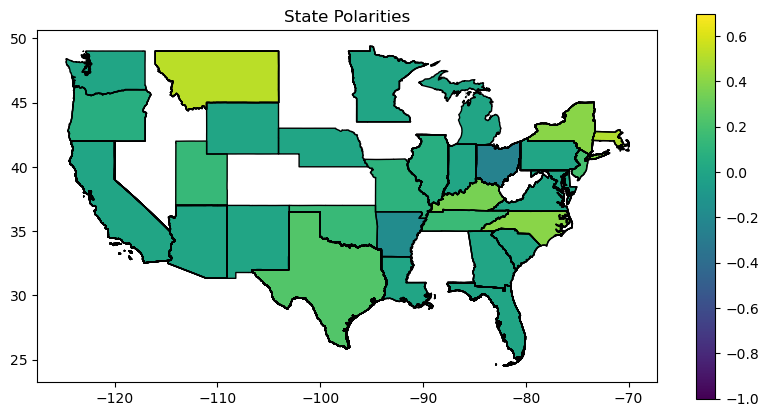

In [65]:
#converting pandas df into geopandas df and then plotting state polarities
map_df = gpd.GeoDataFrame(map_df, crs="EPSG:4326", geometry='geometry')
new_plot=map_df.boundary.plot(edgecolor='black',linewidth=1,figsize=(10,5))
plt.title('State Polarities')
map_df.plot(ax=new_plot,column='polarity',legend=True)

<AxesSubplot:title={'center':'State Subjectivities'}>

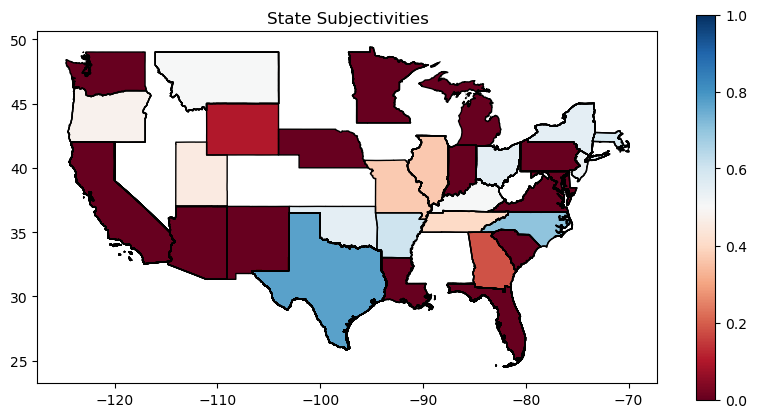

In [66]:
#plotting state subjectivites
new_plot=map_df.boundary.plot(edgecolor='black',linewidth=1,figsize=(10,5))
plt.title('State Subjectivities')
map_df.plot(ax=new_plot,column='subjectivity',legend=True,cmap='RdBu')